In [1]:
import pandas as pd

In [2]:
path_to_excel_file = "Sample_Customore_Order raw.xlsx"
sheet_name = "raw"
df = pd.read_excel(path_to_excel_file, sheet_name=sheet_name)

In [5]:
print(df)

       customer_unique_id    order_id  item_quantity created_day  \
0                       1  A000000001              1  2019-07-01   
1                       2  A000000002              1  2019-07-01   
2                       3  A000000003              1  2019-07-01   
3                       4  A000000004              1  2019-07-01   
4                       5  A000000005              1  2019-07-01   
...                   ...         ...            ...         ...   
61723               30091  A000037831              1  2019-07-30   
61724               30511  A000037832              1  2019-07-30   
61725               30512  A000037833              1  2019-07-30   
61726               30513  A000037834              1  2019-07-30   
61727               30060  A000037835              1  2019-07-30   

       onsite_original_price  selling_price  shipping_fee  voucher_platform  \
0                     338000         259000          3000                 0   
1                     175

In [6]:
sum = 0
for value in df["voucher_platform"]:
    sum+= value
print(sum)

0


In [7]:
sum1 = 0
for value in df["voucher_seller"]:
    sum1+= value
print(sum1)

0


Chứng tỏ hai cột 'voucher_platform' và 'voucher_seller' toàn giá trị 0 nên tôi sẽ bỏ hai cột này

In [8]:
df = df.drop(["voucher_platform", "voucher_seller"], axis=1)
print(df)

       customer_unique_id    order_id  item_quantity created_day  \
0                       1  A000000001              1  2019-07-01   
1                       2  A000000002              1  2019-07-01   
2                       3  A000000003              1  2019-07-01   
3                       4  A000000004              1  2019-07-01   
4                       5  A000000005              1  2019-07-01   
...                   ...         ...            ...         ...   
61723               30091  A000037831              1  2019-07-30   
61724               30511  A000037832              1  2019-07-30   
61725               30512  A000037833              1  2019-07-30   
61726               30513  A000037834              1  2019-07-30   
61727               30060  A000037835              1  2019-07-30   

       onsite_original_price  selling_price  shipping_fee  \
0                     338000         259000          3000   
1                     175000         139000             0   


In [49]:
# bỏ đi cột ngày tháng và chỉ lấy lại ngày 
date_list = []
for value in df["created_day"]:
    # date = str(value)
    # date = date.split('-')[2]
    date_list.append(value.day)
df["date"] = date_list
df = df.drop("created_day", axis=1)
print(df)

       customer_unique_id    order_id  item_quantity  onsite_original_price  \
0                       1  A000000001              1                 338000   
1                       2  A000000002              1                 175000   
2                       3  A000000003              1                 520000   
3                       4  A000000004              1                 238000   
4                       5  A000000005              1                 159000   
...                   ...         ...            ...                    ...   
61723               30091  A000037831              1                 155000   
61724               30511  A000037832              1                 475000   
61725               30512  A000037833              1                 135000   
61726               30513  A000037834              1                 350000   
61727               30060  A000037835              1                 215000   

       selling_price  shipping_fee  voucher_platfor

In [10]:
payment_dict = df["payment_method"].value_counts().to_dict()
print(payment_dict)

{'Cash on Delivery': 53988, 'Airpay GIRO': 2804, 'Cybersource': 1783, 'Airpay Wallet V2': 1367, 'Shopee Wallet': 366, 'VN Airpay Ibanking (Vietcombank)': 308, 'Cybersource (new)': 246, 'VN Airpay Ibanking (Techcombank)': 168, 'VN Airpay Ibanking (BIDV)': 124, 'VN Airpay Ibanking (VPbank)': 111, 'VN Airpay Ibanking (Vietinbank)': 95, 'VN Airpay Ibanking (Agribank)': 93, 'VN Airpay Ibanking (ACB)': 63, 'VN Airpay Ibanking (DongAbank)': 39, 'VN Airpay Ibanking (Sacombank)': 36, 'VN Airpay Ibanking (TPbank)': 29, 'VN Airpay Ibanking (MB)': 26, 'VN Airpay Ibanking (MSbank)': 22, 'VN Airpay Ibanking (OCB)': 10, 'VN Airpay Ibanking (HDbank)': 7, 'VN Airpay Ibanking (NCB)': 7, 'VN Airpay Ibanking (Oceanbank)': 6, 'VN Airpay Ibanking (Eximbank)': 6, 'VN Airpay Ibanking (SHB)': 6, 'VN Airpay Ibanking (VIB)': 6, 'VN Airpay Ibanking (SEAB)': 4, 'VN Airpay Ibanking (Indovina)': 3, 'VN Airpay Ibanking (SGB)': 1, 'VN Airpay Ibanking (SCB)': 1, 'VN Airpay Ibanking (LPB)': 1, 'VN Airpay Ibanking (ABB)'

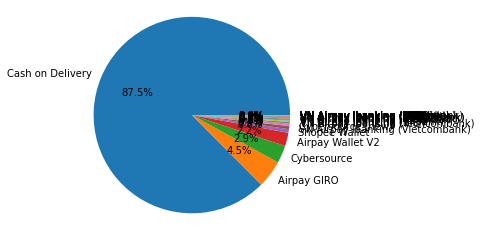

In [11]:
import matplotlib.pyplot as plt
labels = payment_dict.keys()
counts = payment_dict.values()
# Vẽ biểu đồ tròn
plt.pie(counts, labels=labels, autopct='%1.1f%%')
plt.axis('equal')  # Đảm bảo biểu đồ tròn có hình dạng đúng
plt.show()

In [12]:
import json
with open('output.json', 'w') as file:
    json.dump(payment_dict, file, indent=4)

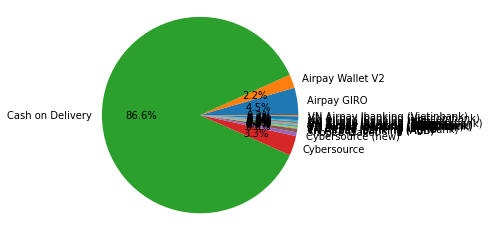

In [13]:
# Lấy doanh thu của payment_method
payment_method_revenue = df.groupby("payment_method").agg({"selling_price": "sum"}).to_dict()
# with open('output1.json', 'w') as file:
#     json.dump(payment_method_revenue, file, indent=4)
# print(payment_method_revenue)
revenue_labels = payment_method_revenue["selling_price"].keys()
revenue_counts = payment_method_revenue["selling_price"].values()
# Vẽ biểu đồ tròn
plt.pie(revenue_counts, labels=revenue_labels, autopct='%1.1f%%')
plt.axis('equal')  # Đảm bảo biểu đồ tròn có hình dạng đúng
plt.show()

In [14]:
payment_method_status = pd.pivot_table(df, index="order_status", columns="payment_method", aggfunc="size", fill_value=0)
print(payment_method_status)

payment_method  Airpay GIRO  Airpay Wallet V2  Cash on Delivery  Cybersource  \
order_status                                                                   
CANCELLED               597               168             10418           51   
COMPLETED              2207              1199             43570         1732   

payment_method  Cybersource (new)  Shopee Wallet  VN Airpay Ibanking (ABB)  \
order_status                                                                 
CANCELLED                      37             25                         1   
COMPLETED                     209            341                         0   

payment_method  VN Airpay Ibanking (ACB)  VN Airpay Ibanking (Agribank)  \
order_status                                                              
CANCELLED                             31                             61   
COMPLETED                             32                             32   

payment_method  VN Airpay Ibanking (BIDV)  ...  VN Airpay Ibankin

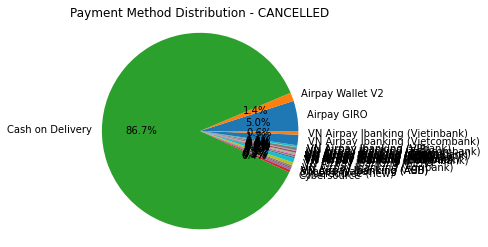

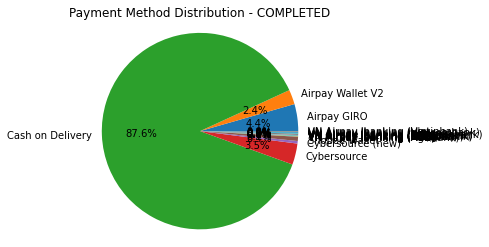

In [15]:
for status in payment_method_status.index:
    data = payment_method_status.loc[status]
    labels = data.index
    counts = data.values

    plt.pie(counts, labels=labels, autopct='%1.1f%%')
    plt.title(f"Payment Method Distribution - {status}")
    plt.axis('equal')
    plt.show()

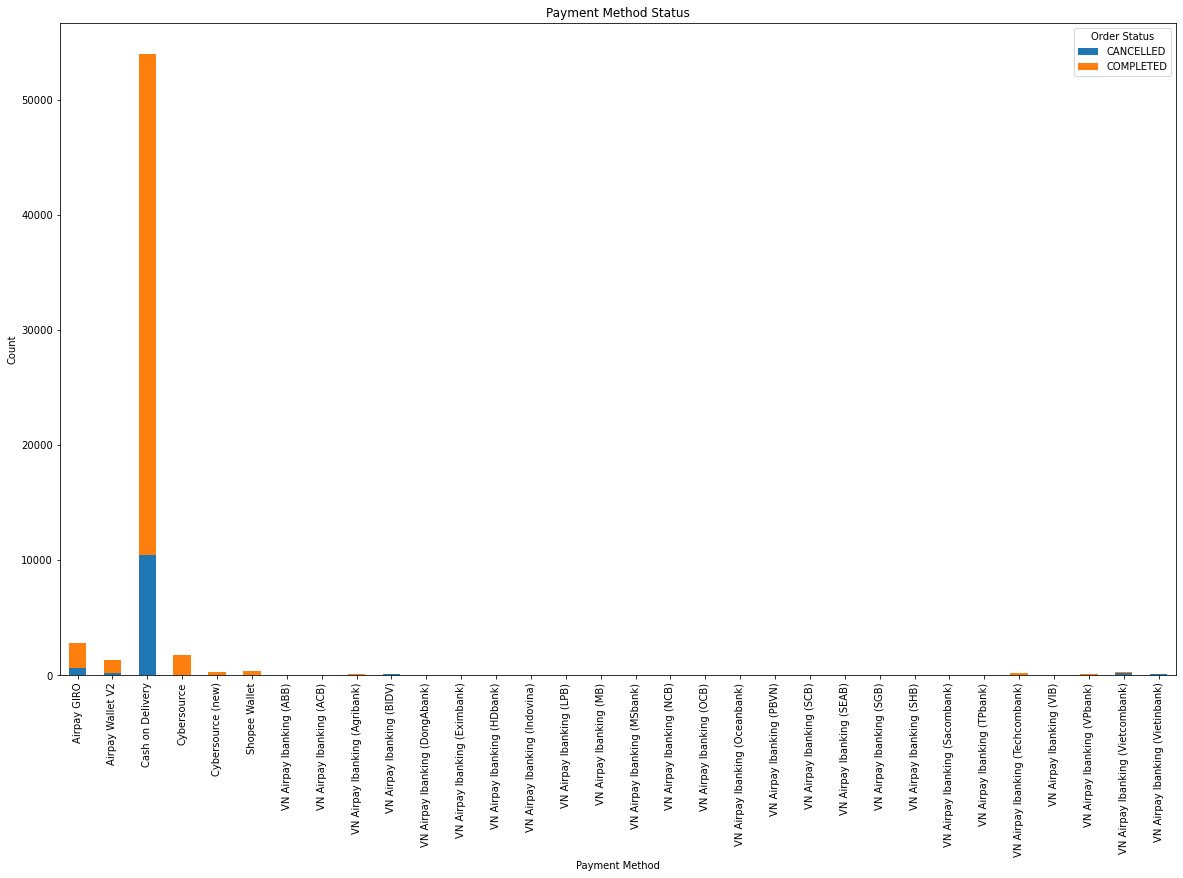

In [16]:
payment_method_status = pd.pivot_table(df, index="payment_method", columns="order_status", aggfunc="size", fill_value=0)

# Đặt kích thước của biểu đồ
fig, ax = plt.subplots(figsize=(20, 12))

# Vẽ biểu đồ cột chồng
payment_method_status.plot(kind="bar", stacked=True, ax=ax)

# Đặt tiêu đề và các nhãn trục
plt.title("Payment Method Status")
plt.xlabel("Payment Method")
plt.ylabel("Count")
plt.legend(title="Order Status")

plt.show()

In [3]:
new_payment_method = []
for value in df["payment_method"]:
    tmp = value
    value = value.split(' ')[0]
    if value == 'VN':
        tmp = 'VN Airpay Ibanking'
    else :
        pass
    new_payment_method.append(tmp)
df["new_payment_method"] = new_payment_method
print(df)

       customer_unique_id    order_id  item_quantity created_day  \
0                       1  A000000001              1  2019-07-01   
1                       2  A000000002              1  2019-07-01   
2                       3  A000000003              1  2019-07-01   
3                       4  A000000004              1  2019-07-01   
4                       5  A000000005              1  2019-07-01   
...                   ...         ...            ...         ...   
61723               30091  A000037831              1  2019-07-30   
61724               30511  A000037832              1  2019-07-30   
61725               30512  A000037833              1  2019-07-30   
61726               30513  A000037834              1  2019-07-30   
61727               30060  A000037835              1  2019-07-30   

       onsite_original_price  selling_price  shipping_fee  voucher_platform  \
0                     338000         259000          3000                 0   
1                     175

In [4]:
new_payment_dict = df["new_payment_method"].value_counts().to_dict()
print(new_payment_dict)

{'Cash on Delivery': 53988, 'Airpay GIRO': 2804, 'Cybersource': 1783, 'Airpay Wallet V2': 1367, 'VN Airpay Ibanking': 1174, 'Shopee Wallet': 366, 'Cybersource (new)': 246}


In [6]:
# Tong so don
df["order_id"].count()

61728

In [8]:
df["order_status"].value_counts()

COMPLETED    49717
CANCELLED    12011
Name: order_status, dtype: int64

In [10]:
# tong quantity ban duoc
df["item_quantity"].sum()

68626

In [11]:
df.loc[df["order_status"] == "COMPLETED", "selling_price"].sum()

7539809130

In [18]:
df["payment_method"].eq("Cash on Delivery").sum()

53988

In [20]:
df.loc[df["payment_method"] == "Cash on Delivery", "item_quantity"].sum()

60260

In [22]:
df.loc[(df["order_status"] == "COMPLETED") & (df["new_payment_method"] == "Cash on Delivery"), "selling_price"].sum()

6550880700

In [23]:
df.loc[(df["payment_method"] == "Cash on Delivery") & (df["order_status"] == "COMPLETED")].shape[0]

43570

In [24]:
df.loc[(df["payment_method"] == "Cash on Delivery") & (df["order_status"] == "CANCELLED")].shape[0]

10418

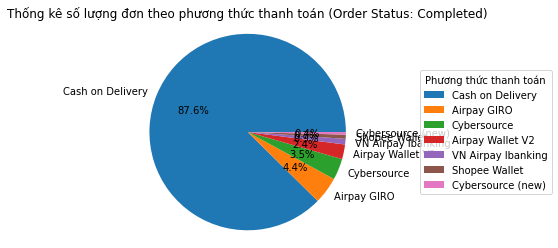

In [29]:
import matplotlib.pyplot as plt
df_completed = df[df["order_status"] == "COMPLETED"]

# Thống kê số lượng đơn theo phương thức thanh toán
thong_ke = df_completed['new_payment_method'].value_counts()

# Vẽ biểu đồ tròn
plt.pie(thong_ke, labels=thong_ke.index, autopct='%1.1f%%')
plt.legend(title="Phương thức thanh toán", loc="center left", bbox_to_anchor=(1, 0.5))
plt.title("Thống kê số lượng đơn theo phương thức thanh toán (Order Status: Completed)")
plt.axis('equal')

# Hiển thị biểu đồ
plt.show()

In [30]:
import plotly.graph_objects as go
# Lọc các dòng có order_status là "COMPLETED"
df_completed = df[df["order_status"] == "COMPLETED"]

# Thống kê số lượng đơn theo phương thức thanh toán
thong_ke = df_completed['new_payment_method'].value_counts()

# Tạo đối tượng Pie
fig = go.Figure(data=go.Pie(labels=thong_ke.index, values=thong_ke))

# Cấu hình layout
fig.update_layout(
    title="Thống kê số lượng đơn theo phương thức thanh toán (Order Status: COMPLETED)",
    showlegend=True,
    legend_title="Phương thức thanh toán"
)

# Hiển thị biểu đồ
fig.show()

In [31]:
df_completed = df[df["order_status"] == "CANCELLED"]

# Thống kê số lượng đơn theo phương thức thanh toán
thong_ke = df_completed['new_payment_method'].value_counts()

# Tạo đối tượng Pie
fig = go.Figure(data=go.Pie(labels=thong_ke.index, values=thong_ke))

# Cấu hình layout
fig.update_layout(
    title="Thống kê số lượng đơn theo phương thức thanh toán (Order Status: CANCELLED)",
    showlegend=True,
    legend_title="Phương thức thanh toán"
)

# Hiển thị biểu đồ
fig.show()

In [34]:
import plotly.graph_objects as go
df_completed = df[df["order_status"] == "COMPLETED"]
thong_ke = df_completed.groupby('new_payment_method')['item_quantity'].sum()
fig = go.Figure(data=go.Pie(labels=thong_ke.index, values=thong_ke))
fig.update_layout(
        title="Quantity COMPLETED",
        showlegend=True,
        legend_title="Phương thức thanh toán"
    )


In [35]:
# Lọc các dòng có order_status là "Completed" và "Cancelled"
df_completed = df[df["order_status"] == "COMPLETED"]
df_cancelled = df[df["order_status"] == "CANCELLED"]

# Thống kê số lượng đơn thành công theo phương thức thanh toán
thong_ke_completed = df_completed['new_payment_method'].value_counts()

# Thống kê số lượng đơn bị cancelled theo phương thức thanh toán
thong_ke_cancelled = df_cancelled['new_payment_method'].value_counts()

# Tạo đối tượng Figure
fig = go.Figure()

# Thêm đường (line) đơn thành công
fig.add_trace(go.Scatter(
    x=thong_ke_completed.index,
    y=thong_ke_completed.values,
    mode='lines',
    name='Đơn thành công',
    line=dict(color='red')
))

# Thêm đường (line) đơn bị cancelled
fig.add_trace(go.Scatter(
    x=thong_ke_cancelled.index,
    y=thong_ke_cancelled.values,
    mode='lines',
    name='Đơn bị cancelled',
    line=dict(color='blue')
))

# Cấu hình layout
fig.update_layout(
    title="Thống kê số lượng đơn theo phương thức thanh toán",
    xaxis_title="Phương thức thanh toán",
    yaxis_title="Số lượng đơn",
    legend_title="Trạng thái",
    showlegend=True
)

# Hiển thị chú thích (legend) trên biểu đồ
fig.update_layout(legend=dict(x=0, y=1, bgcolor='rgba(255, 255, 255, 0.5)'))

# Hiển thị biểu đồ
fig.show()


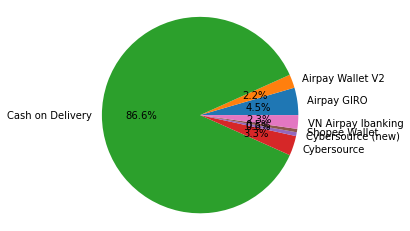

In [19]:
# Lấy doanh thu của payment_method
new_payment_method_revenue = df.groupby("new_payment_method").agg({"selling_price": "sum"}).to_dict()
# with open('output1.json', 'w') as file:
#     json.dump(payment_method_revenue, file, indent=4)
# print(payment_method_revenue)
revenue_labels = new_payment_method_revenue["selling_price"].keys()
revenue_counts = new_payment_method_revenue["selling_price"].values()
# Vẽ biểu đồ tròn
plt.pie(revenue_counts, labels=revenue_labels, autopct='%1.1f%%')
plt.axis('equal')  # Đảm bảo biểu đồ tròn có hình dạng đúng
plt.show()

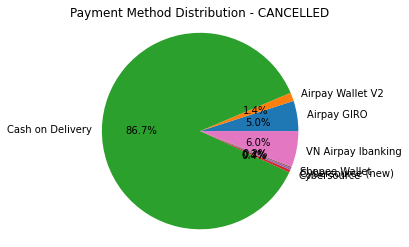

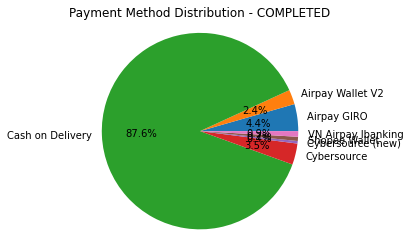

In [20]:
new_payment_method_status = pd.pivot_table(df, index="order_status", columns="new_payment_method", aggfunc="size", fill_value=0)
for status in new_payment_method_status.index:
    data = new_payment_method_status.loc[status]
    labels = data.index
    counts = data.values

    plt.pie(counts, labels=labels, autopct='%1.1f%%')
    plt.title(f"Payment Method Distribution - {status}")
    plt.axis('equal')
    plt.show()

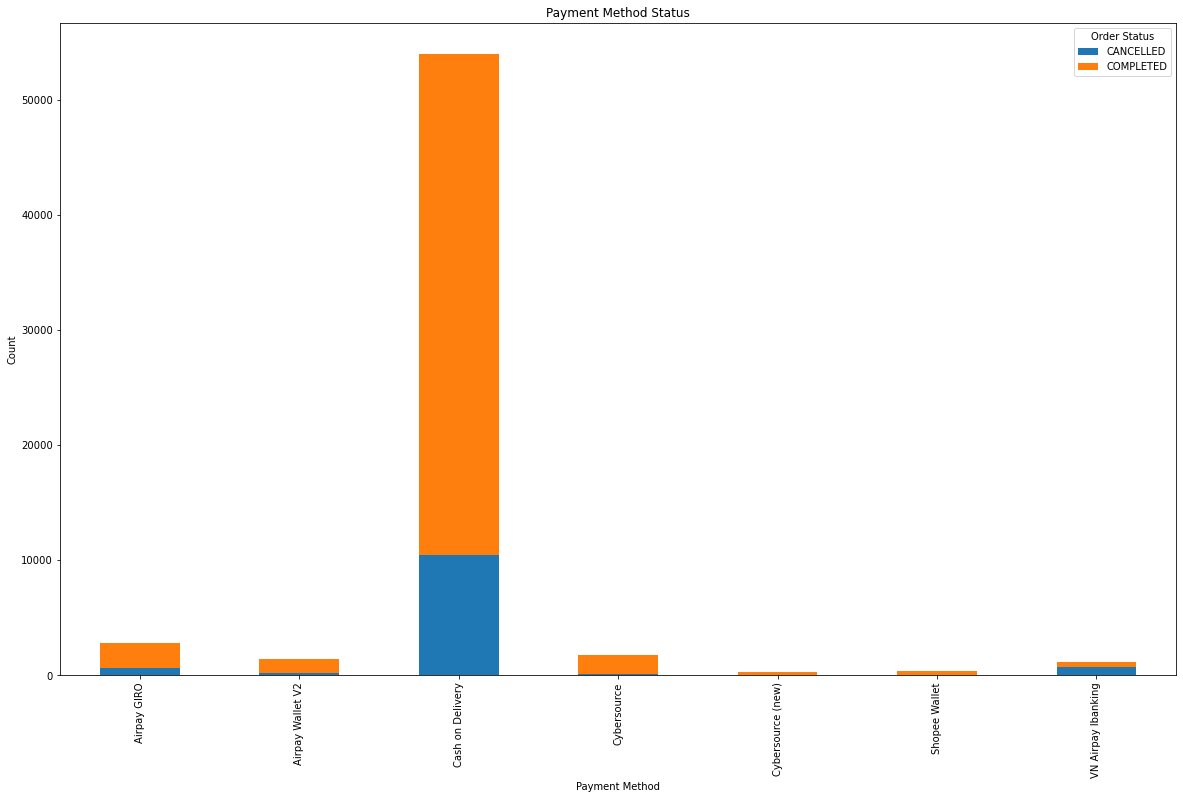

In [21]:
new_payment_method_status = pd.pivot_table(df, index="new_payment_method", columns="order_status", aggfunc="size", fill_value=0)

# Đặt kích thước của biểu đồ
fig, ax = plt.subplots(figsize=(20, 12))

# Vẽ biểu đồ cột chồng
new_payment_method_status.plot(kind="bar", stacked=True, ax=ax)

# Đặt tiêu đề và các nhãn trục
plt.title("Payment Method Status")
plt.xlabel("Payment Method")
plt.ylabel("Count")
plt.legend(title="Order Status")

plt.show()

In [40]:
new_payment_method_status = pd.pivot_table(df, index="new_payment_method", columns="order_status", aggfunc="size", fill_value=0)

# Lấy danh sách phương thức thanh toán
payment_methods = new_payment_method_status.index.tolist()

# Tạo danh sách màu sắc cho các trạng thái đơn
colors = ["blue", "red"]

# Tạo danh sách các trace
traces = []
for i, order_status in enumerate(new_payment_method_status.columns):
    counts = new_payment_method_status[order_status].values
    trace = go.Bar(
        x=payment_methods,
        y=counts,
        name=order_status,
        marker=dict(color=colors[i])
    )
    traces.append(trace)

# Tạo đối tượng Figure
fig = go.Figure(data=traces)

# Cấu hình layout
fig.update_layout(
    title="Payment Method Status",
    xaxis_title="Payment Method",
    yaxis_title="Count",
    barmode='stack',
    legend_title="Order Status"
)

# Hiển thị biểu đồ
fig.show()

In [36]:
# Tạo bảng pivot thống kê số lượng đơn theo phương thức thanh toán và trạng thái đơn
new_payment_method_status = pd.pivot_table(df, index="new_payment_method", columns="order_status", aggfunc="size", fill_value=0)

# Chuyển đổi bảng pivot thành dạng dữ liệu long (tidy)
new_payment_method_status = new_payment_method_status.reset_index().melt(id_vars="new_payment_method", var_name="Order Status", value_name="Count")

# Tạo đối tượng Figure
fig = go.Figure()

# Thêm các cột cho từng phương thức thanh toán
for payment_method in new_payment_method_status['new_payment_method'].unique():
    df_payment_method = new_payment_method_status[new_payment_method_status['new_payment_method'] == payment_method]
    fig.add_trace(go.Bar(
        x=df_payment_method['Order Status'],
        y=df_payment_method['Count'],
        name=payment_method
    ))

# Cấu hình layout
fig.update_layout(
    title="Payment Method Status",
    xaxis_title="Order Status",
    yaxis_title="Count",
    barmode='stack',
    legend_title="Payment Method"
)

# Hiển thị biểu đồ
fig.show()

In [38]:
payment_method_status = pd.pivot_table(df, index="new_payment_method", columns="order_status", aggfunc="size", fill_value=0)

# Tạo danh sách phương thức thanh toán
payment_methods = payment_method_status.index.tolist()

# Tạo đối tượng Figure
fig = go.Figure()

# Thêm cột thành công cho từng phương thức thanh toán
for payment_method in payment_methods:
    completed_count = payment_method_status.loc[payment_method, "COMPLETED"]
    fig.add_trace(go.Bar(
        x=[payment_method],
        y=[completed_count],
        name=f"Completed ({payment_method})"
    ))

# Thêm cột hủy bỏ cho từng phương thức thanh toán
for payment_method in payment_methods:
    cancelled_count = payment_method_status.loc[payment_method, "CANCELLED"]
    fig.add_trace(go.Bar(
        x=[payment_method],
        y=[cancelled_count],
        name=f"Cancelled ({payment_method})"
    ))

# Cấu hình layout
fig.update_layout(
    title="Payment Method Status",
    xaxis_title="Payment Method",
    yaxis_title="Count",
    barmode='stack',
    legend_title="Order Status"
)

# Hiển thị biểu đồ
fig.show()

In [39]:
payment_method_status = pd.pivot_table(df, index="new_payment_method", columns="order_status", aggfunc="size", fill_value=0)

# Lấy danh sách phương thức thanh toán
payment_methods = payment_method_status.index.tolist()

# Tạo danh sách màu sắc cho cột "COMPLETED" và "CANCELLED"
colors = ["red", "blue"]

# Tạo đối tượng Figure
fig = go.Figure()

# Thêm cột thành công và cột hủy bỏ cho từng phương thức thanh toán
for i, payment_method in enumerate(payment_methods):
    completed_count = payment_method_status.loc[payment_method, "COMPLETED"]
    cancelled_count = payment_method_status.loc[payment_method, "CANCELLED"]
    
    fig.add_trace(go.Bar(
        x=[payment_method],
        y=[completed_count],
        name=f"Completed ({payment_method})",
        marker=dict(color=colors[0])
    ))
    
    fig.add_trace(go.Bar(
        x=[payment_method],
        y=[cancelled_count],
        name=f"Cancelled ({payment_method})",
        marker=dict(color=colors[1])
    ))

# Cấu hình layout
fig.update_layout(
    title="Payment Method Status",
    xaxis_title="Payment Method",
    yaxis_title="Count",
    barmode='stack',
    legend_title="Order Status"
)

# Hiển thị biểu đồ
fig.show()

In [22]:
canceled_orders = df[df["order_status"] == "CANCELLED"]
revenue_by_payment_method = canceled_orders.groupby("new_payment_method")["selling_price"].sum()
print(revenue_by_payment_method)

new_payment_method
Airpay GIRO             86826000
Airpay Wallet V2        23363000
Cash on Delivery      1545530590
Cybersource              7793000
Cybersource (new)       10084000
Shopee Wallet            3271000
VN Airpay Ibanking     133992360
Name: selling_price, dtype: int64


In [44]:
dis_list = []
for value1, value2 in zip(df["onsite_original_price"],df["selling_price"]):
    dis = value1 - value2
    dis_list.append(int((dis/value1)*100))
df["dis"] = dis_list
print(df)

       customer_unique_id    order_id  item_quantity created_day  \
0                       1  A000000001              1  2019-07-01   
1                       2  A000000002              1  2019-07-01   
2                       3  A000000003              1  2019-07-01   
3                       4  A000000004              1  2019-07-01   
4                       5  A000000005              1  2019-07-01   
...                   ...         ...            ...         ...   
61723               30091  A000037831              1  2019-07-30   
61724               30511  A000037832              1  2019-07-30   
61725               30512  A000037833              1  2019-07-30   
61726               30513  A000037834              1  2019-07-30   
61727               30060  A000037835              1  2019-07-30   

       onsite_original_price  selling_price  shipping_fee  voucher_platform  \
0                     338000         259000          3000                 0   
1                     175

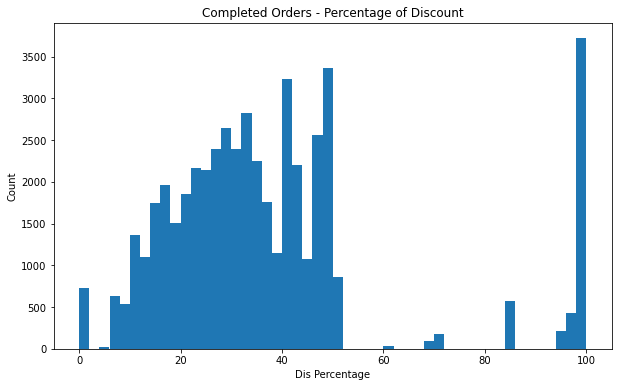

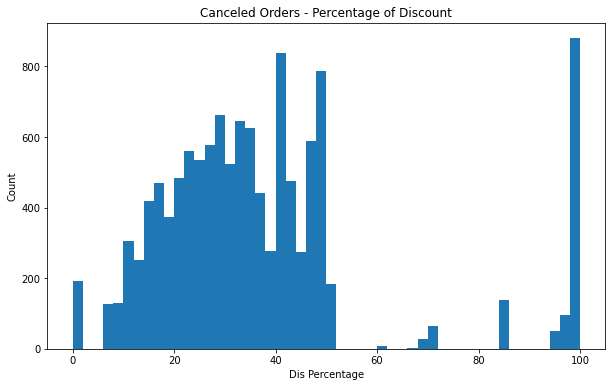

In [24]:
completed_orders = df[df["order_status"] == "COMPLETED"]
canceled_orders = df[df["order_status"] == "CANCELLED"]

# Vẽ biểu đồ cho trạng thái COMPLETED
plt.figure(figsize=(10, 6))
plt.hist(completed_orders["dis"], bins=50, range=(0, 100))
plt.title("Completed Orders - Percentage of Discount")
plt.xlabel("Dis Percentage")
plt.ylabel("Count")
plt.show()

# Vẽ biểu đồ cho trạng thái CANCELED
plt.figure(figsize=(10, 6))
plt.hist(canceled_orders["dis"], bins=50, range=(0, 100))
plt.title("Canceled Orders - Percentage of Discount")
plt.xlabel("Dis Percentage")
plt.ylabel("Count")
plt.show()

In [48]:

completed_orders = df[df["order_status"] == "COMPLETED"]
canceled_orders = df[df["order_status"] == "CANCELLED"]
# Tạo histogram cho trạng thái COMPLETED
fig = go.Figure(data=[go.Histogram(x=completed_orders["dis"], nbinsx=50)])

# Đặt tiêu đề và các nhãn trục
fig.update_layout(title_text="Completed Orders - Percentage of Discount",
                  xaxis_title="Dis Percentage",
                  yaxis_title="Count")

# Hiển thị biểu đồ
fig.show()

In [25]:
print(canceled_orders)

       customer_unique_id    order_id  item_quantity  onsite_original_price  \
0                       1  A000000001              1                 338000   
4                       5  A000000005              1                 159000   
8                       8  A000000008              1                 199000   
9                       9  A000000009              1                 198000   
11                     11  A000000011              1                 205000   
...                   ...         ...            ...                    ...   
61697               21959  A000037472              1                 125000   
61710               30481  A000037791              1                 155000   
61714               30509  A000037825              1                 250000   
61715               30073  A000037826              1                 250000   
61726               30513  A000037834              1                 350000   

       selling_price  shipping_fee                 

In [26]:
print(completed_orders)

       customer_unique_id    order_id  item_quantity  onsite_original_price  \
1                       2  A000000002              1                 175000   
2                       3  A000000003              1                 520000   
3                       4  A000000004              1                 238000   
5                       6  A000000006              1                 135000   
6                       7  A000000007              1                 159000   
...                   ...         ...            ...                    ...   
61722               15949  A000037829              1                 215000   
61723               30091  A000037831              1                 155000   
61724               30511  A000037832              1                 475000   
61725               30512  A000037833              1                 135000   
61727               30060  A000037835              1                 215000   

       selling_price  shipping_fee    payment_metho

In [27]:
filtered_rows = df[(df["order_status"] == "CANCELLED") & (df["dis"] == 100)]
print(filtered_rows)

       customer_unique_id    order_id  item_quantity  onsite_original_price  \
7487                 4423  A000004954              4                 258000   
9697                 2105  A000006884              1                 198000   
9699                 2105  A000006884              1                 258000   
9700                 2105  A000006884              2                 140000   
17539               10065  A000011696              1                 245000   
17540               10065  A000011696              1                 238000   
19810               11158  A000012964              1                 110000   
19833               11158  A000012964              1                 108000   
29030               15448  A000018313              3                 205000   
29031               15448  A000018313              2                 135000   
31675               14583  A000019393              2                 125000   
31682               14583  A000019393              1

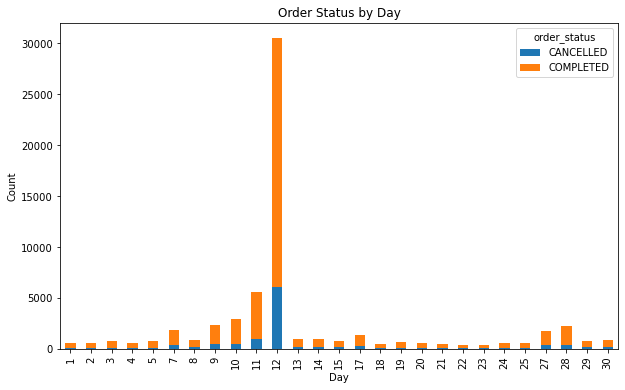

In [28]:
df_new = df[["date", "order_status"]]
df_grouped = df_new.groupby(["date", "order_status"]).size().unstack(fill_value=0)

# Vẽ biểu đồ cột chồng
df_grouped.plot(kind="bar", stacked=True, figsize=(10, 6))

# Đặt tiêu đề và nhãn cho biểu đồ
plt.title("Order Status by Day")
plt.xlabel("Day")
plt.ylabel("Count")

# Hiển thị biểu đồ
plt.show()

In [50]:
df_daily_orders = df.groupby(['date', 'order_status']).size().reset_index(name='count')

# Tạo biểu đồ đường
fig = go.Figure()

# Thêm line đỏ thể hiện số lượng đơn COMPLETED
fig.add_trace(go.Scatter(x=df_daily_orders[df_daily_orders['order_status'] == 'COMPLETED']['date'],
                         y=df_daily_orders[df_daily_orders['order_status'] == 'COMPLETED']['count'],
                         mode='lines',
                         name='Completed',
                         line=dict(color='red')
                        ))

# Thêm line xanh thể hiện số lượng đơn CANCELLED
fig.add_trace(go.Scatter(x=df_daily_orders[df_daily_orders['order_status'] == 'CANCELLED']['date'],
                         y=df_daily_orders[df_daily_orders['order_status'] == 'CANCELLED']['count'],
                         mode='lines',
                         name='Cancelled',
                         line=dict(color='blue')
                        ))

# Đặt tiêu đề và các nhãn trục
fig.update_layout(title_text='Daily Order Count',
                  xaxis_title='Date',
                  yaxis_title='Order Count')

# Hiển thị biểu đồ
fig.show()

In [51]:
df_daily_orders = df.groupby(['date', 'order_status']).size().reset_index(name='count')

# Tạo biểu đồ scatter line
fig = go.Figure()

# Thêm line đỏ thể hiện số lượng đơn COMPLETED
fig.add_trace(go.Scatter(x=df_daily_orders[df_daily_orders['order_status'] == 'COMPLETED']['date'],
                         y=df_daily_orders[df_daily_orders['order_status'] == 'COMPLETED']['count'],
                         mode='lines+markers',
                         name='Completed',
                         line=dict(color='red'),
                         marker=dict(color='red', size=8)
                        ))

# Thêm line xanh thể hiện số lượng đơn CANCELLED
fig.add_trace(go.Scatter(x=df_daily_orders[df_daily_orders['order_status'] == 'CANCELLED']['date'],
                         y=df_daily_orders[df_daily_orders['order_status'] == 'CANCELLED']['count'],
                         mode='lines+markers',
                         name='Cancelled',
                         line=dict(color='blue'),
                         marker=dict(color='blue', size=8)
                        ))

# Đặt tiêu đề và các nhãn trục
fig.update_layout(title_text='Daily Order Count',
                  xaxis_title='Date',
                  yaxis_title='Order Count')

# Hiển thị biểu đồ
fig.show()

In [52]:
df_daily_orders = df.groupby(['date', 'order_status']).size().reset_index(name='count')

# Tạo biểu đồ scatter line
fig = go.Figure()

# Thêm line đỏ thể hiện số lượng đơn COMPLETED
fig.add_trace(go.Scatter(x=df_daily_orders[df_daily_orders['order_status'] == 'COMPLETED']['date'],
                         y=df_daily_orders[df_daily_orders['order_status'] == 'COMPLETED']['count'],
                         mode='lines+markers',
                         name='Completed',
                         line=dict(color='red'),
                         marker=dict(color='red', size=8)
                        ))

# Thêm line xanh thể hiện số lượng đơn CANCELLED
fig.add_trace(go.Scatter(x=df_daily_orders[df_daily_orders['order_status'] == 'CANCELLED']['date'],
                         y=df_daily_orders[df_daily_orders['order_status'] == 'CANCELLED']['count'],
                         mode='lines+markers',
                         name='Cancelled',
                         line=dict(color='blue'),
                         marker=dict(color='blue', size=8)
                        ))

# Đặt tiêu đề và các nhãn trục
fig.update_layout(title_text='Daily Order Count',
                  xaxis=dict(title='Date', type='category'),
                  yaxis=dict(title='Order Count'))

# Hiển thị biểu đồ
fig.show()

In [54]:
df_daily_quantity = df.groupby(['date', 'order_status'])['item_quantity'].sum().reset_index(name='total_quantity')

# Tạo biểu đồ scatter line
fig = go.Figure()

# Thêm line đỏ thể hiện số lượng quantity bán được COMPLETED
fig.add_trace(go.Scatter(x=df_daily_quantity[df_daily_quantity['order_status'] == 'COMPLETED']['date'],
                         y=df_daily_quantity[df_daily_quantity['order_status'] == 'COMPLETED']['total_quantity'],
                         mode='lines+markers',
                         name='Completed',
                         line=dict(color='red'),
                         marker=dict(color='red', size=8)
                        ))

# Thêm line xanh thể hiện số lượng quantity bán được CANCELLED
fig.add_trace(go.Scatter(x=df_daily_quantity[df_daily_quantity['order_status'] == 'CANCELLED']['date'],
                         y=df_daily_quantity[df_daily_quantity['order_status'] == 'CANCELLED']['total_quantity'],
                         mode='lines+markers',
                         name='Cancelled',
                         line=dict(color='blue'),
                         marker=dict(color='blue', size=8)
                        ))

# Đặt tiêu đề và các nhãn trục
fig.update_layout(title_text='Daily Quantity Sold',
                  xaxis=dict(title='Date', type='category'),
                  yaxis=dict(title='Quantity Sold'))

# Hiển thị biểu đồ
fig.show()

In [55]:
df_daily_price = df.groupby(['date', 'order_status'])['selling_price'].sum().reset_index(name='total_price')

# Tạo biểu đồ scatter line
fig = go.Figure()

# Thêm line đỏ thể hiện số lượng selling_price bán được COMPLETED
fig.add_trace(go.Scatter(x=df_daily_price[df_daily_price['order_status'] == 'COMPLETED']['date'],
                         y=df_daily_price[df_daily_price['order_status'] == 'COMPLETED']['total_price'],
                         mode='lines+markers',
                         name='Completed',
                         line=dict(color='red'),
                         marker=dict(color='red', size=8)
                        ))

# Thêm line xanh thể hiện số lượng selling_price bán được CANCELLED
fig.add_trace(go.Scatter(x=df_daily_price[df_daily_price['order_status'] == 'CANCELLED']['date'],
                         y=df_daily_price[df_daily_price['order_status'] == 'CANCELLED']['total_price'],
                         mode='lines+markers',
                         name='Cancelled',
                         line=dict(color='blue'),
                         marker=dict(color='blue', size=8)
                        ))

# Đặt tiêu đề và các nhãn trục
fig.update_layout(title_text='Daily Selling Price',
                  xaxis=dict(title='Date', type='category'),
                  yaxis=dict(title='Selling Price'))

# Hiển thị biểu đồ
fig.show()

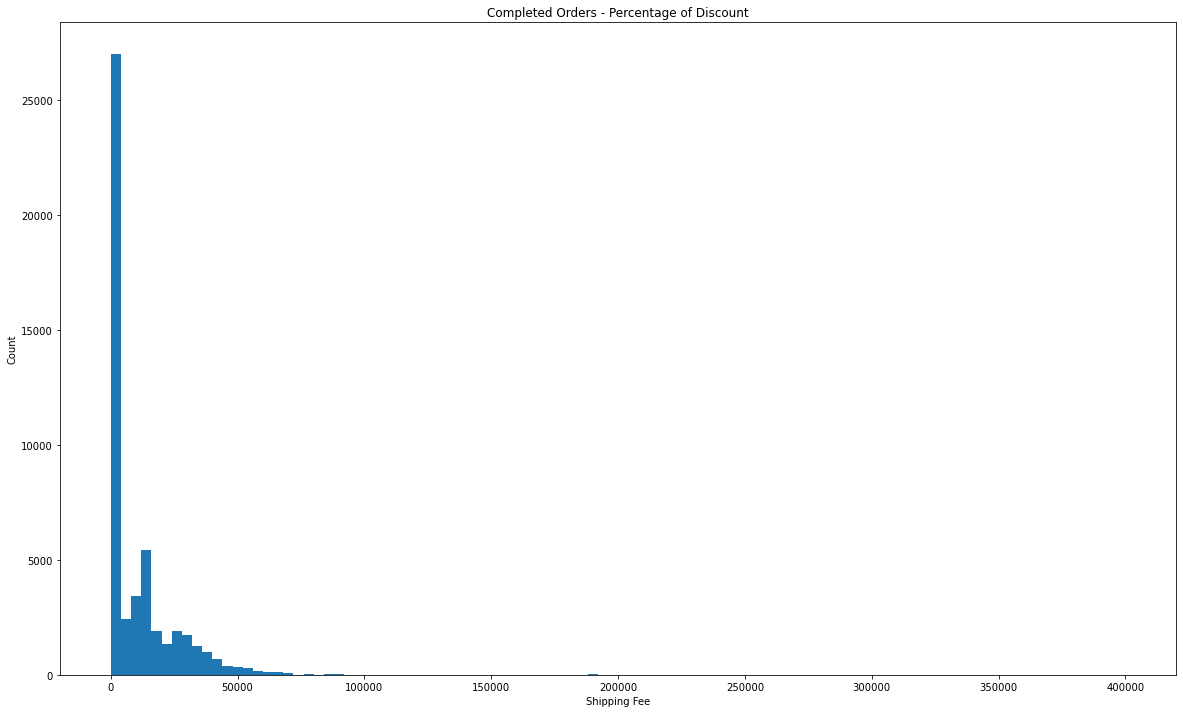

In [30]:
plt.figure(figsize=(20, 12))
plt.hist(completed_orders["shipping_fee"], bins=100, range=(0, 400000))
plt.title("Completed Orders - Percentage of Discount")
plt.xlabel("Shipping Fee")
plt.ylabel("Count")
plt.show()

In [56]:
fig = go.Figure(data=[go.Histogram(x=completed_orders["shipping_fee"], nbinsx=100)])

# Đặt tiêu đề và các nhãn trục
fig.update_layout(title_text="Completed Orders - Shipping Fee Histogram",
                  xaxis=dict(title="Shipping Fee"),
                  yaxis=dict(title="Count"))

# Hiển thị biểu đồ
fig.show()

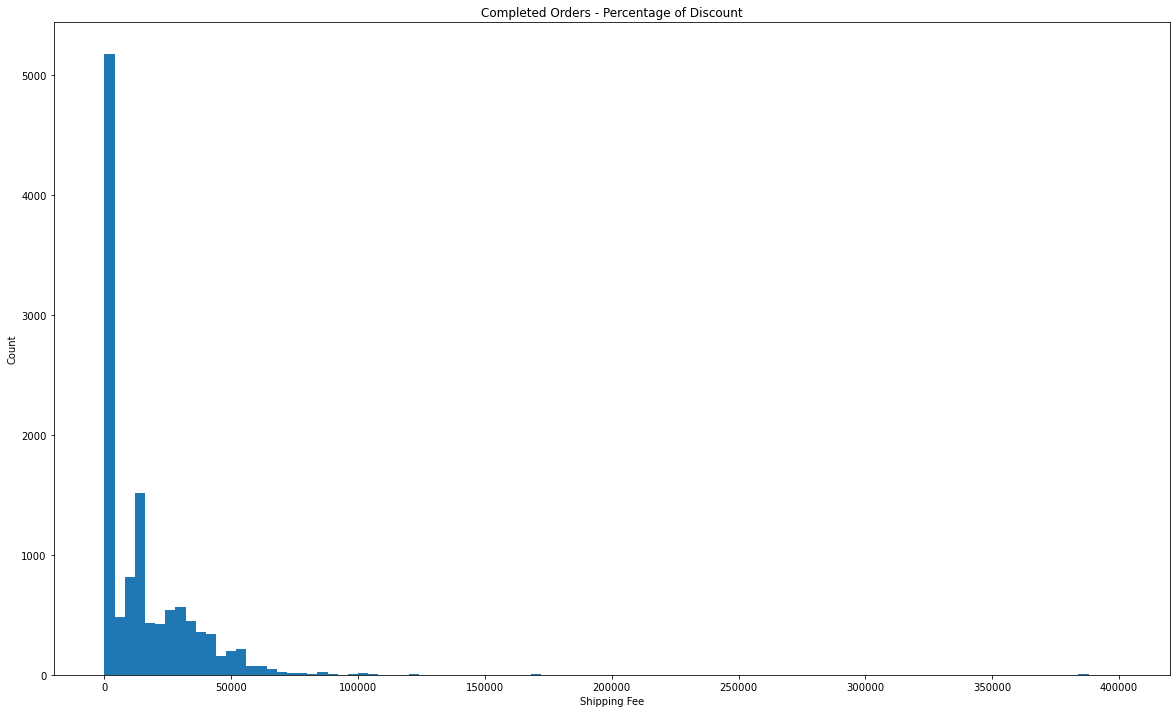

In [31]:
plt.figure(figsize=(20, 12))
plt.hist(canceled_orders["shipping_fee"], bins=100, range=(0, 400000))
plt.title("Completed Orders - Percentage of Discount")
plt.xlabel("Shipping Fee")
plt.ylabel("Count")
plt.show()

In [57]:
fig = go.Figure(data=[go.Histogram(x=canceled_orders["shipping_fee"], nbinsx=100)])

# Đặt tiêu đề và các nhãn trục
fig.update_layout(title_text="Cancelled Orders - Shipping Fee Histogram",
                  xaxis=dict(title="Shipping Fee"),
                  yaxis=dict(title="Count"))

# Hiển thị biểu đồ
fig.show()

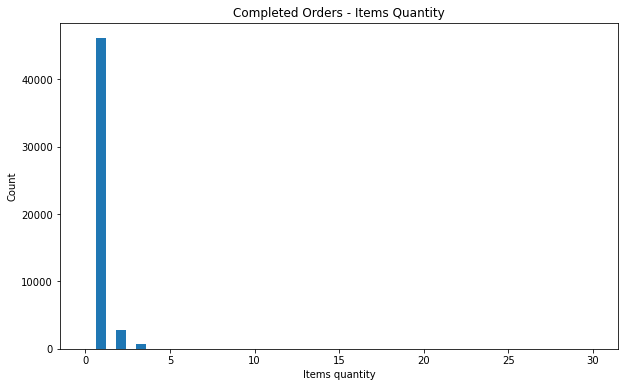

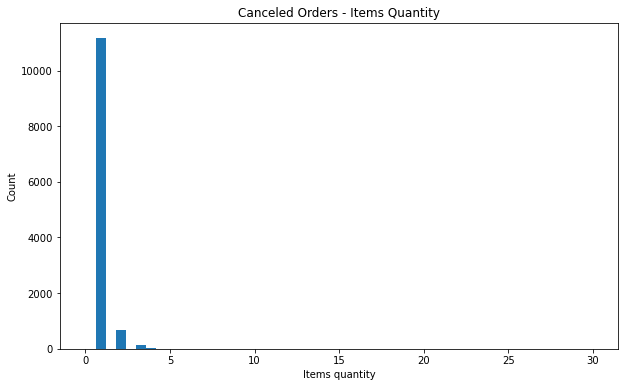

In [35]:
# Vẽ biểu đồ cho trạng thái COMPLETED
plt.figure(figsize=(10, 6))
plt.hist(completed_orders["item_quantity"], bins=50, range=(0, 30))
plt.title("Completed Orders - Items Quantity")
plt.xlabel("Items quantity")
plt.ylabel("Count")
plt.show()

# Vẽ biểu đồ cho trạng thái CANCELED
plt.figure(figsize=(10, 6))
plt.hist(canceled_orders["item_quantity"], bins=50, range=(0, 30))
plt.title("Canceled Orders - Items Quantity")
plt.xlabel("Items quantity")
plt.ylabel("Count")
plt.show()

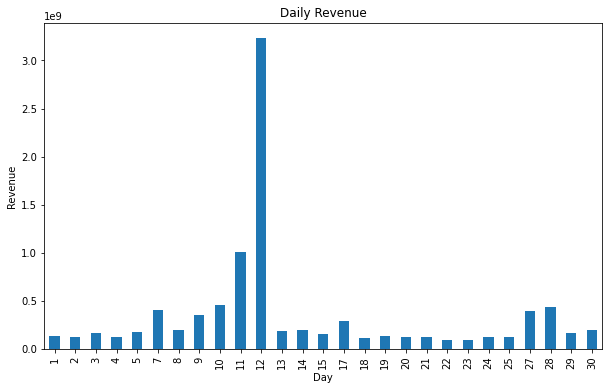

In [36]:
df_new = df[["date", "selling_price"]]

# Tính tổng revenue theo từng ngày
df_grouped = df_new.groupby("date")["selling_price"].sum()

# Vẽ biểu đồ cột
df_grouped.plot(kind="bar", figsize=(10, 6))

# Đặt tiêu đề và nhãn cho biểu đồ
plt.title("Daily Revenue")
plt.xlabel("Day")
plt.ylabel("Revenue")

# Hiển thị biểu đồ
plt.show()







